In [2]:
# import my libraries
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# creating a connection with db and my cursor
conn = sqlite3.connect('attr_data.db')
cursor = conn.cursor()

In [4]:
cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")
print(cursor.fetchall())

[('attrition_records',), ('sqlite_sequence',)]


In [5]:
cursor.execute("PRAGMA table_info(attrition_records)")
cursor.fetchall()

[(0, 'id', 'INTEGER', 0, None, 1),
 (1, 'Age', 'INT', 0, None, 0),
 (2, 'Attrition', 'TEXT', 0, None, 0),
 (3, 'BusinessTravel', 'TEXT', 0, None, 0),
 (4, 'DailyRate', 'INT', 0, None, 0),
 (5, 'Department', 'TEXT', 0, None, 0),
 (6, 'DistanceFromHome', 'INT', 0, None, 0),
 (7, 'Education', 'INT', 0, None, 0),
 (8, 'EducationField', 'TEXT', 0, None, 0),
 (9, 'EmployeeCount', 'INT', 0, None, 0),
 (10, 'EmployeeNumber', 'INT', 0, None, 0),
 (11, 'EnvironmentSatisfaction', '', 0, None, 0),
 (12, 'Gender', 'TEXT', 0, None, 0),
 (13, 'HourlyRate', 'INT', 0, None, 0),
 (14, 'JobInvolvement', 'INT', 0, None, 0),
 (15, 'JobLevel', 'INT', 0, None, 0),
 (16, 'JobRole', 'TEXT', 0, None, 0),
 (17, 'JobSatisfaction', 'INT', 0, None, 0),
 (18, 'MaritalStatus', 'TEXT', 0, None, 0),
 (19, 'MonthlyIncome', 'INT', 0, None, 0),
 (20, 'MonthlyRate', 'INT', 0, None, 0),
 (21, 'NumCompaniesWorked', 'INT', 0, None, 0),
 (22, 'Over18', 'TEXT', 0, None, 0),
 (23, 'OverTime', 'TEXT', 0, None, 0),
 (24, 'PercentS

In [6]:
query = "SELECT * FROM attrition_records LIMIT 5"
cursor.execute(query)
result = cursor.fetchall()
for i in result:
    print(i)

(1, 41, 'Yes', 'Travel_Rarely', 1102, 'Sales', 1, 2, 'Life Sciences', 1, 1, 2, 'Female', 94, 3, 2, 'Sales Executive', 4, 'Single', 5993, 19479, 8, 'Y', 'Yes', 11, 3, 1, 80, 0, 8, 0, 1, 6, 4, 0, 5)
(2, 49, 'No', 'Travel_Frequently', 279, 'Research & Development', 8, 1, 'Life Sciences', 1, 2, 3, 'Male', 61, 2, 2, 'Research Scientist', 2, 'Married', 5130, 24907, 1, 'Y', 'No', 23, 4, 4, 80, 1, 10, 3, 3, 10, 7, 1, 7)
(3, 37, 'Yes', 'Travel_Rarely', 1373, 'Research & Development', 2, 2, 'Other', 1, 4, 4, 'Male', 92, 2, 1, 'Laboratory Technician', 3, 'Single', 2090, 2396, 6, 'Y', 'Yes', 15, 3, 2, 80, 0, 7, 3, 3, 0, 0, 0, 0)
(4, 33, 'No', 'Travel_Frequently', 1392, 'Research & Development', 3, 4, 'Life Sciences', 1, 5, 4, 'Female', 56, 3, 1, 'Research Scientist', 3, 'Married', 2909, 23159, 1, 'Y', 'Yes', 11, 3, 3, 80, 0, 8, 3, 3, 8, 7, 3, 0)
(5, 27, 'No', 'Travel_Rarely', 591, 'Research & Development', 2, 1, 'Medical', 1, 7, 1, 'Male', 40, 3, 1, 'Laboratory Technician', 2, 'Married', 3468, 166

In [7]:
query = "SELECT * FROM attrition_records"
cursor.execute(query)
result = cursor.fetchall()
for i in result:
    df = pd.read_sql_query(query, conn)
    df.to_csv("attr_records.csv", index = False)

In [8]:
df = pd.read_csv('attr_records.csv', index_col='id')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [33]:
print(df.shape)
print(df.isna().sum())
print(df.duplicated().sum())
print(df.info())

(1470, 32)
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64
0
<class 'pandas

In [45]:
# delete columns with 1 unique data and useless columns
not_needed = []
for col in df.columns:
    if len(df[col].unique()) == 1:
        not_needed.append(col)
print(not_needed)

df.drop(not_needed, axis=1, inplace=True)
df.drop('EmployeeNumber', axis= 1, inplace= True)

df.head()

[]


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [46]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Attrition  Age                       
No         (32.0, 46.0]                  636
           (17.956999999999997, 32.0]    387
           (46.0, 60.0]                  210
Yes        (17.959, 31.333]              118
           (31.333, 44.667]               83
           (44.667, 58.0]                 36
Name: Age, dtype: int64


<Figure size 300x300 with 0 Axes>

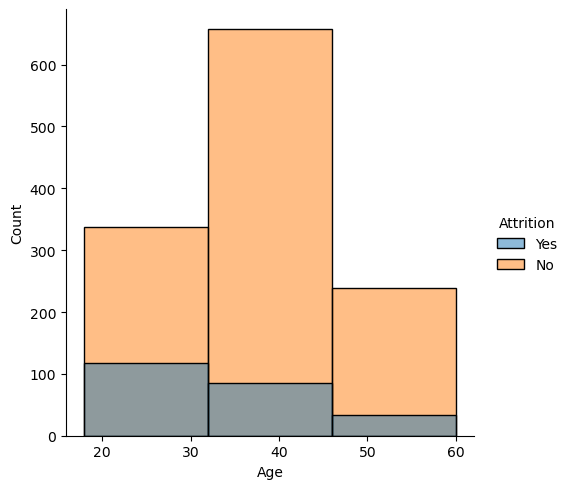

In [73]:
Attr_Gen = df.groupby('Attrition').Age
print(Attr_Gen.value_counts(bins=3))

plt.figure(figsize=((3,3)))
sns.displot(data= df, x= 'Age', hue= 'Attrition', bins= 3);

Observation: 118 (33.7%) of the 350 employees that falls between the age of approx 18 and 32 leaves the organization

<AxesSubplot:xlabel='Gender', ylabel='Count'>

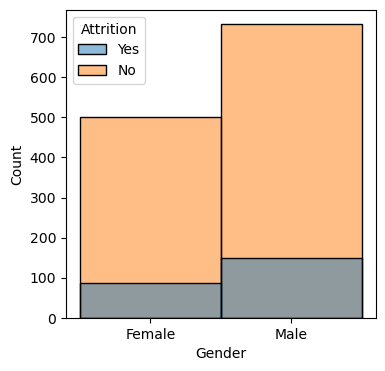

In [77]:
plt.figure(figsize=(4,4))
sns.histplot(data= df, x= 'Gender', hue= 'Attrition')

Observation: Male tend to have a little higher attition than the female. Gender does not affect attrition in a big way 

<Figure size 400x400 with 0 Axes>

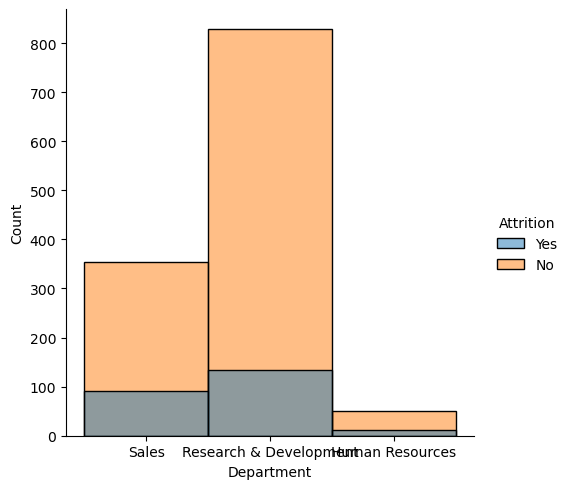

In [78]:
plt.figure(figsize=(4,4))
sns.displot(x= 'Department', hue= 'Attrition', data= df);

With Research and Development Department having the highest attrition value, the rate does not stand out as a core reason for attrition

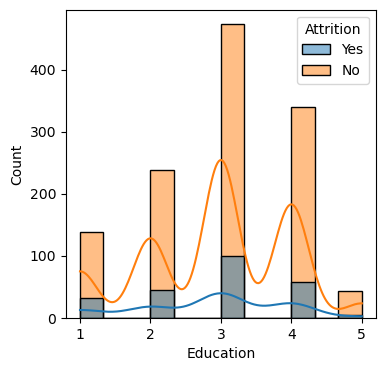

In [79]:
plt.figure(figsize=(4,4))
sns.histplot(x= 'Education', hue= 'Attrition', data= df, kde= True);

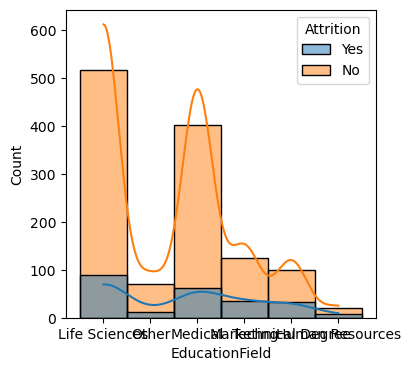

In [80]:
plt.figure(figsize=(4,4))
sns.histplot(x= 'EducationField', hue= 'Attrition', data= df, kde= True);

Observation: Business and technical employees seems to have a higher tendency to leave the company than other employees.

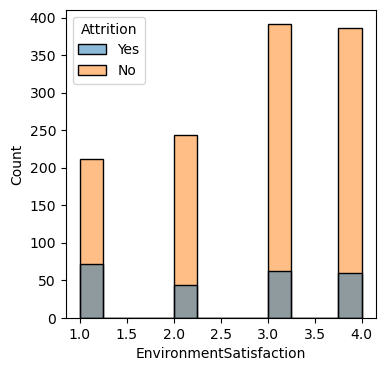

In [81]:
plt.figure(figsize=(4,4))
sns.histplot(x= 'EnvironmentSatisfaction', hue= 'Attrition', data= df);

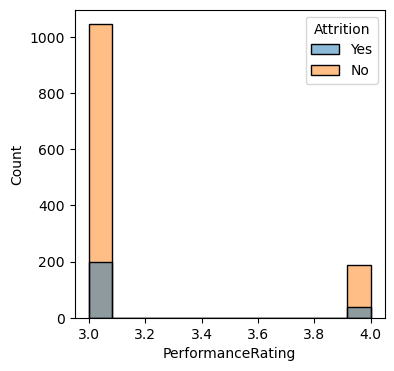

In [82]:
plt.figure(figsize=(4,4))
sns.histplot(x= 'PerformanceRating', hue= 'Attrition', data= df);

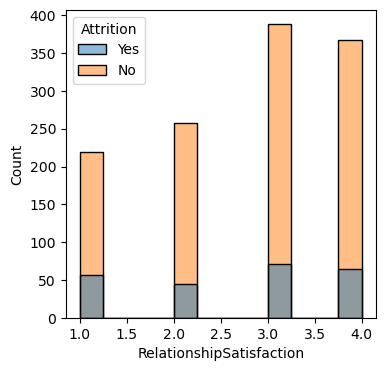

In [83]:
plt.figure(figsize=(4,4))
sns.histplot(x= 'RelationshipSatisfaction', hue= 'Attrition', data= df);

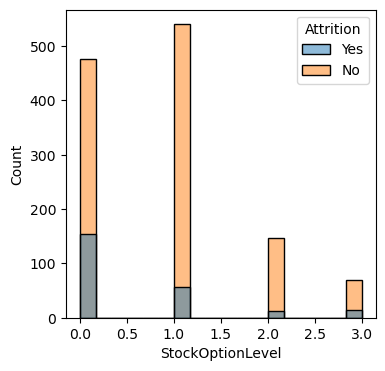

In [84]:
plt.figure(figsize=(4,4))
sns.histplot(x= 'StockOptionLevel', hue= 'Attrition', data= df);

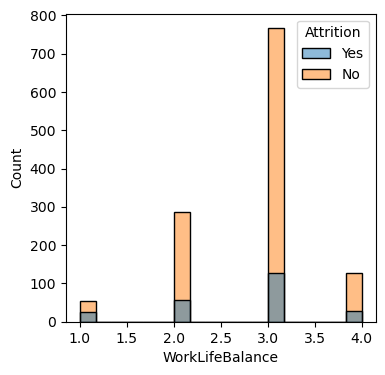

In [85]:
plt.figure(figsize=(4,4))
sns.histplot(x= 'WorkLifeBalance', hue= 'Attrition', data= df);

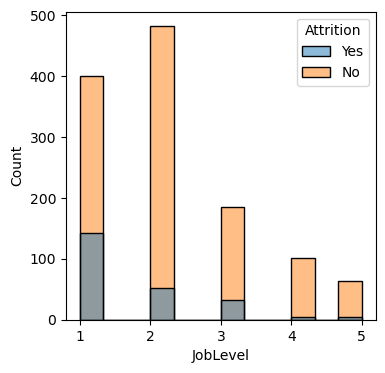

In [90]:
plt.figure(figsize=(4,4))
sns.histplot(x= 'JobLevel', hue= 'Attrition', data= df);

Observation: Less experienced employees leave the company compared to people with advance experience

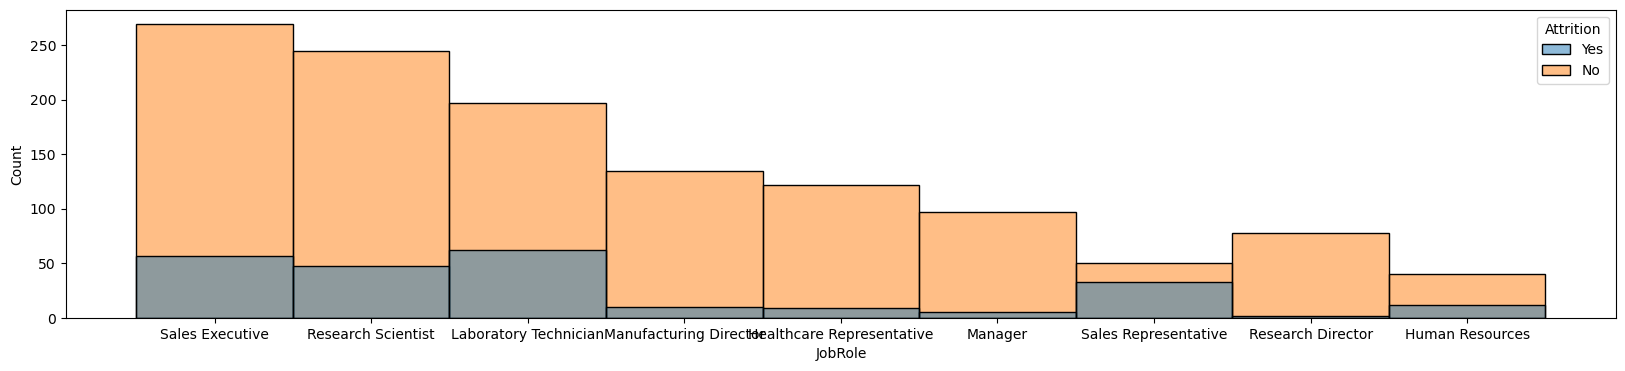

In [94]:
plt.figure(figsize=(20,4))
sns.histplot(x= 'JobRole', hue= 'Attrition', data= df);

Observation: Sales Representatives followed by Human Resources and Lab Tehnicians tends to leave the company the most.

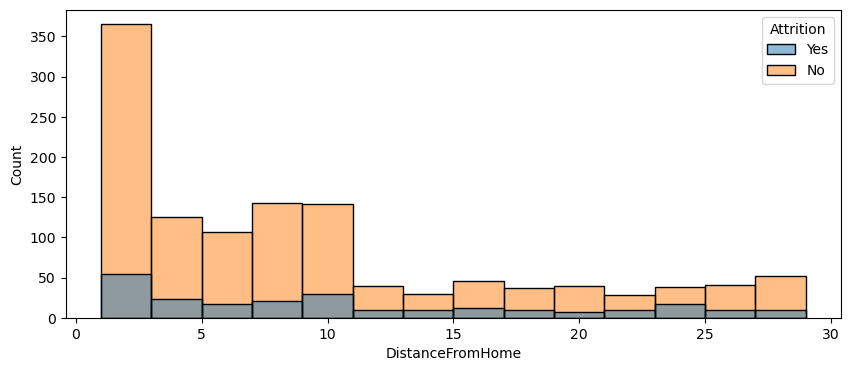

In [102]:
plt.figure(figsize=(10,4))
sns.histplot(x= 'DistanceFromHome', hue= 'Attrition', data= df);

Observation: Most Employees stay close with a fair attrition rate compared to employees staying far with a higher level of attrition.

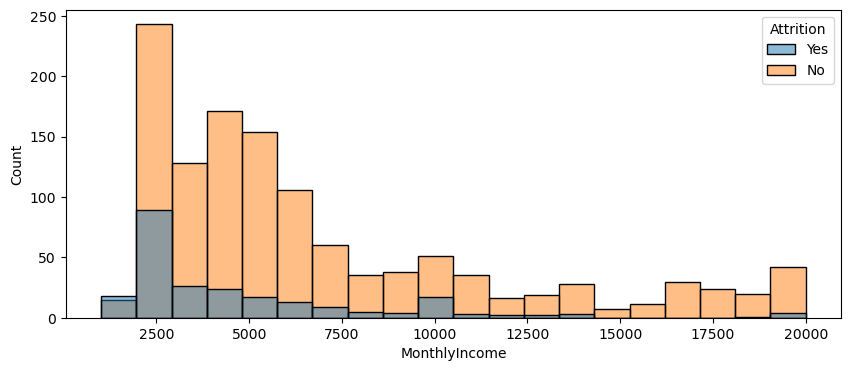

In [100]:
plt.figure(figsize=(10,4))
sns.histplot(x= 'MonthlyIncome', hue= 'Attrition', data= df);

Observation: People with low Monthly Income will likely leave the organization

In [104]:
# correlation of the dataframe to further study and see the relationship
corr = df.corr()
corr

C:\Users\DELL\AppData\Local\Temp\ipykernel_17840\3571426268.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<AxesSubplot:>

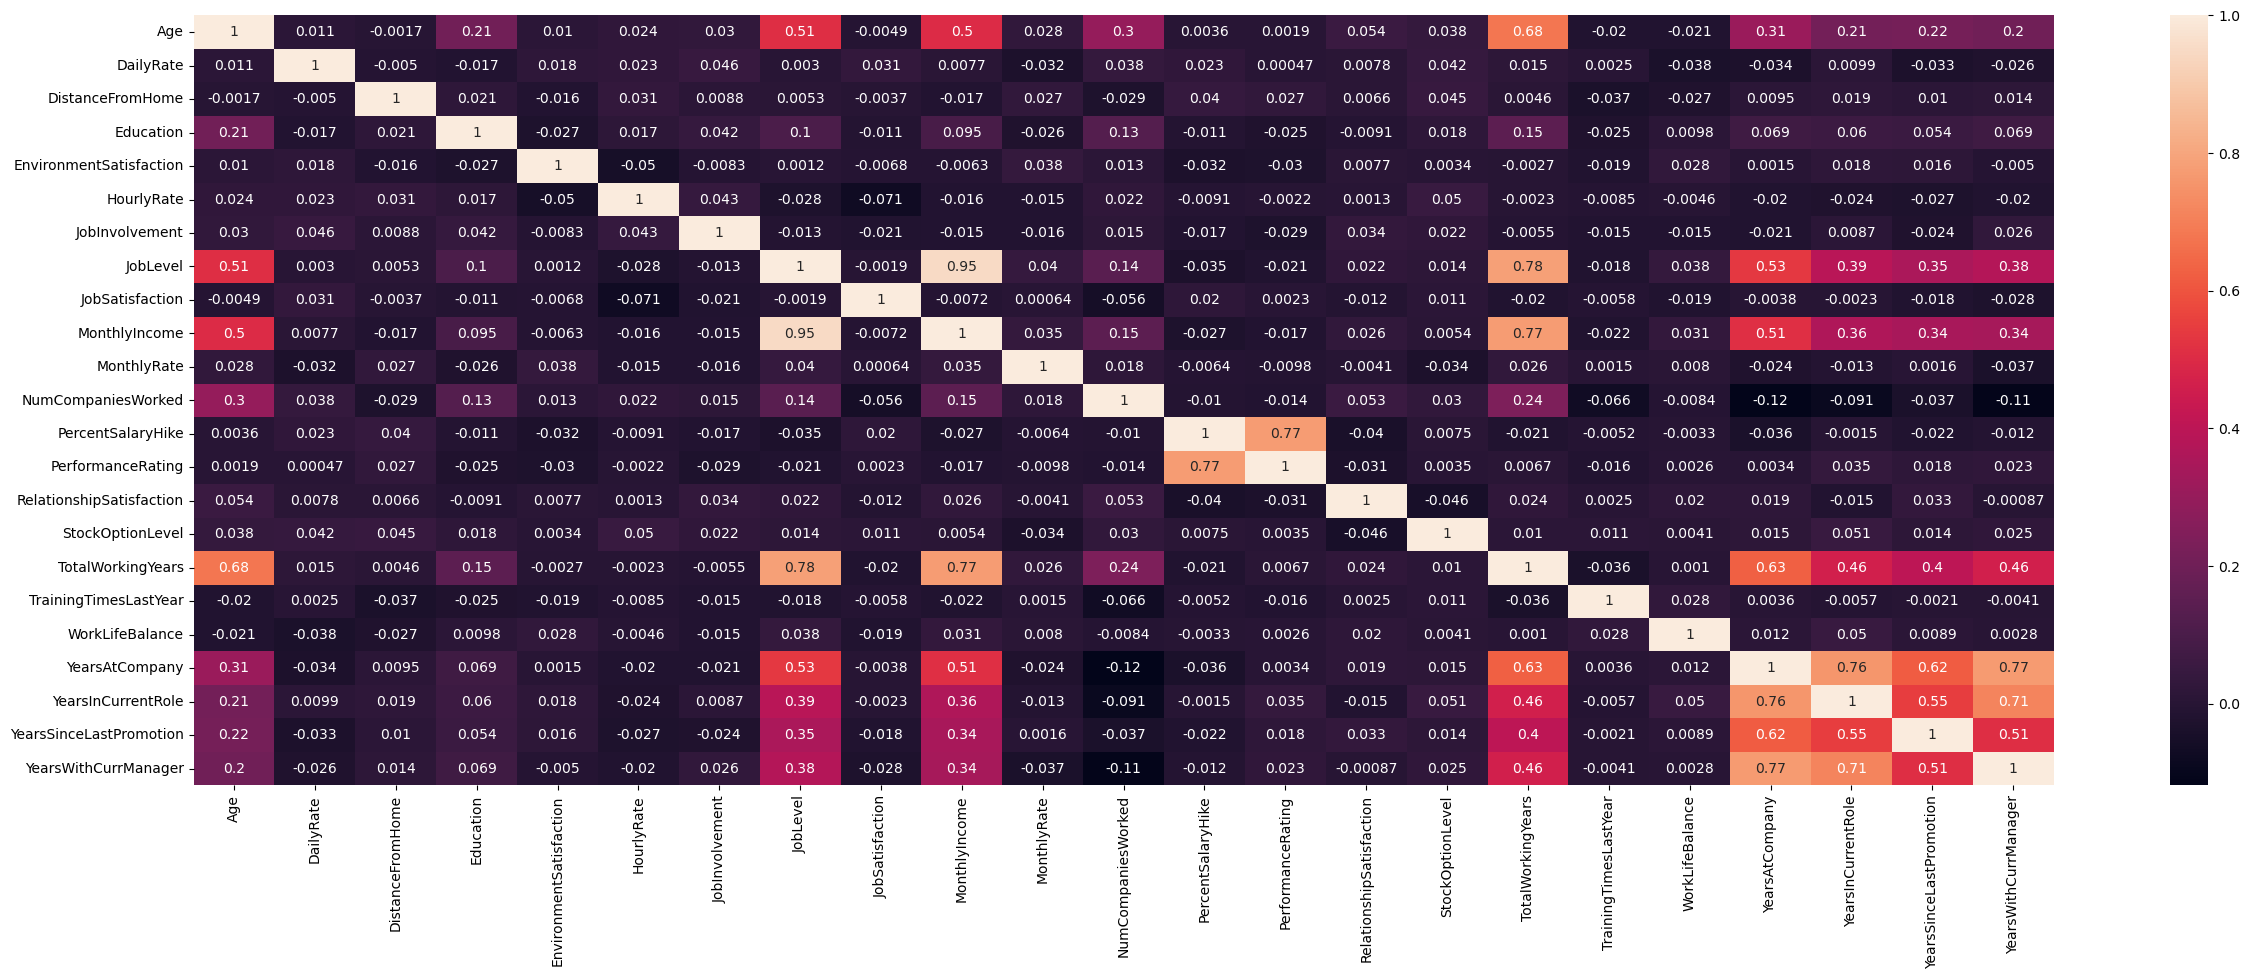

In [105]:
plt.figure(figsize=((30,10)))
sns.heatmap(corr, annot= True)

Observation: Age is moderately correlated with Monthly Income. These Varables are already showned they affect attrition rate.
            Age is also moderately correlated to Joblevel. Less experienced employee who can be defined as young in age can be said to be attrited.
            Monthly Income determines Age, and the Job level which in some ways affects attrition rate.
            Total working Years also determines the Age, Job Level, Monthly Income and others.

Three factors behind employee attrition:
1. Monthly Income
2. Age
3. Job Level

In [114]:
df.groupby('Education').MonthlyIncome.mean()

Education
1    5640.570588
2    6226.645390
3    6517.263986
4    6832.402010
5    8277.645833
Name: MonthlyIncome, dtype: float64

The relationship between Education and Monthly Income:
The higher the level of Education, the higher the average of the Monthly Income

Attrition  Age                       
No         (32.0, 46.0]                  636
           (17.956999999999997, 32.0]    387
           (46.0, 60.0]                  210
Yes        (17.959, 31.333]              118
           (31.333, 44.667]               83
           (44.667, 58.0]                 36
Name: Age, dtype: int64


<Figure size 300x300 with 0 Axes>

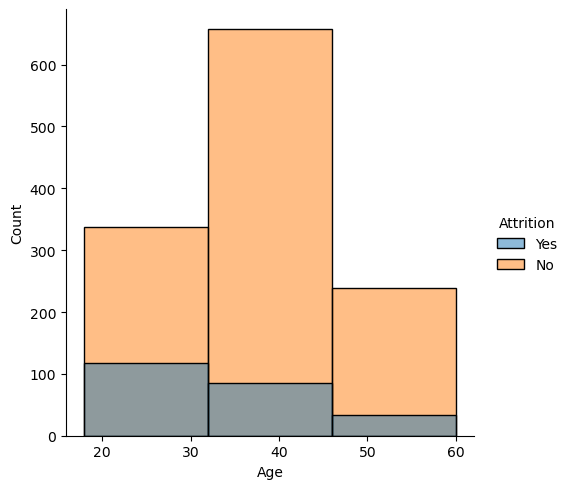

In [115]:
Attr_Gen = df.groupby('Attrition').Age
print(Attr_Gen.value_counts(bins=3))

plt.figure(figsize=((3,3)))
sns.displot(data= df, x= 'Age', hue= 'Attrition', bins= 3);

The effect of age on attrition:
Attrited Employees seems to be younger (32 below) than other age group.

The main factor in employee attrition:
Monthly Income

Work-life balance impact the overall attrition rate:
Employees with low Work-Life Balance attrited more than the other groups.